# Introduction

This purpose of this project is to analyze and visualize Netflix stock data from the year 2017.

Specifically, the following visualizations will be created:
+ The distribution of the stock prices for 2017
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ Netflix's quarterly earnings and revenue
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)

# Loading and inspecting the datasets.

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# NETFLIX

nflx = pd.read_csv('NFLX.csv')
nflx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [3]:
# DOW JONES

dji = pd.read_csv('DJI.csv')
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [4]:
# NETFLIX QUARTERLY

nflx_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
nflx_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


In [5]:
# Improving readability

In [6]:
nflx.rename( columns = {
    'Adj Close': 'Price'
}, inplace = True)
nflx.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [7]:
dji.rename( columns = {
    'Adj Close': 'Price'
}, inplace = True)
dji.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [8]:
nflx_quarterly.rename( columns = {
    'Adj Close': 'Price'
}, inplace = True)
nflx_quarterly.head()

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


# Distribution of Netflix Stock Prices by Quarter

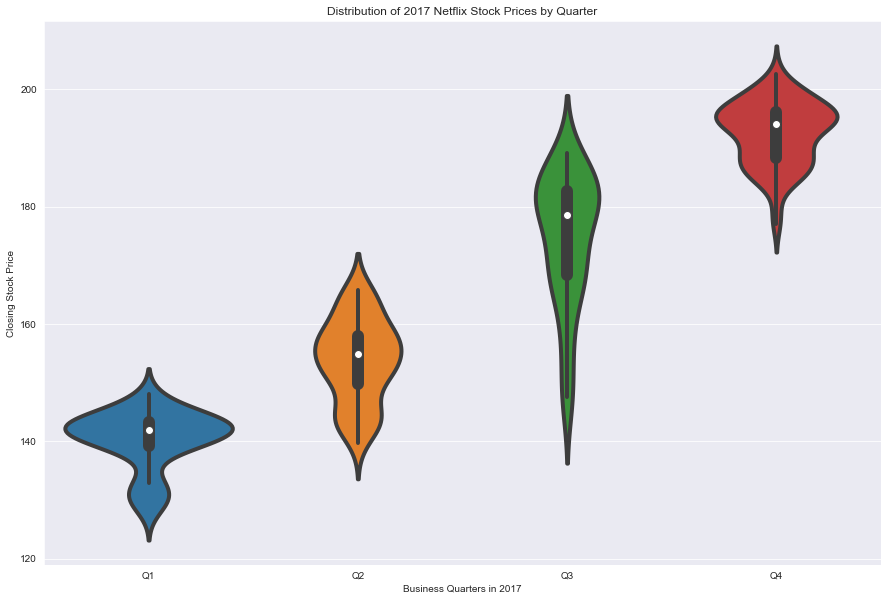

In [9]:
sns.set_style("darkgrid")


plt.figure(figsize = (15, 10))
ax = sns.violinplot(data = nflx_quarterly, x = "Quarter", y = "Price", linewidth = 4)
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
plt.ylabel("Closing Stock Price")
plt.xlabel("Business Quarters in 2017")
plt.show()

# Estimated vs Actual Earnings per Share

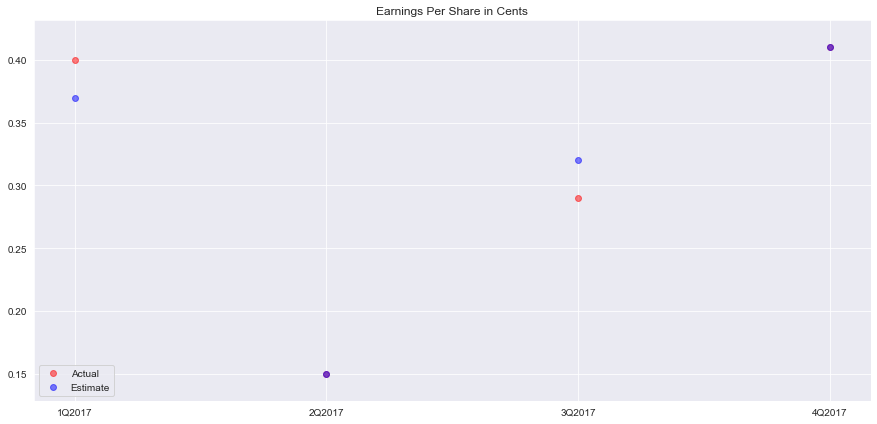

In [10]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.figure(figsize = (15, 7))

plt.scatter(x_positions, earnings_actual, color = "red", alpha = 0.5)
plt.scatter(x_positions, earnings_estimate, color = "blue", alpha = 0.5)
plt.legend(["Actual", "Estimate"], loc = 3)
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
plt.show()

# Netflix Quarterly Revenue & Earnings

In [11]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]



# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]





middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]


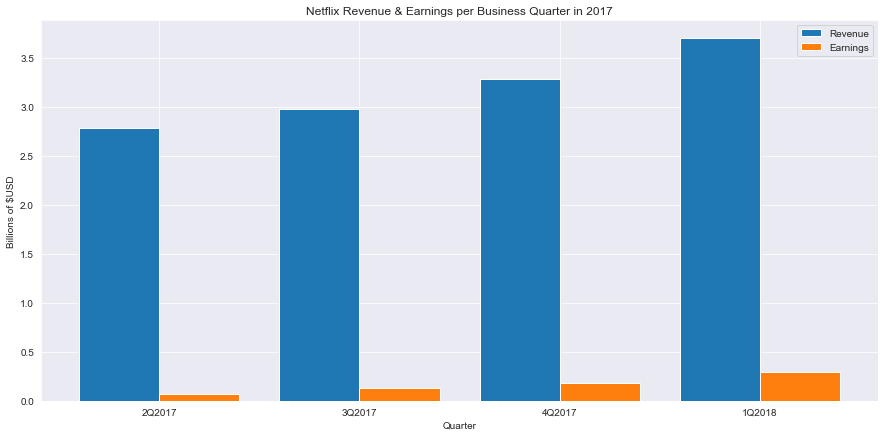

In [12]:
plt.figure(figsize = (15, 7))

plt.bar(bars1_x, revenue_by_quarter)
plt.bar(bars2_x, earnings_by_quarter)
plt.legend(labels)
plt.title("Netflix Revenue & Earnings per Business Quarter in 2017")
plt.xlabel('Quarter')
plt.xticks(middle_x, quarter_labels)
plt.ylabel('Billions of $USD')
plt.show()

# Netflix vs Dow Jones Stock Price Comparison

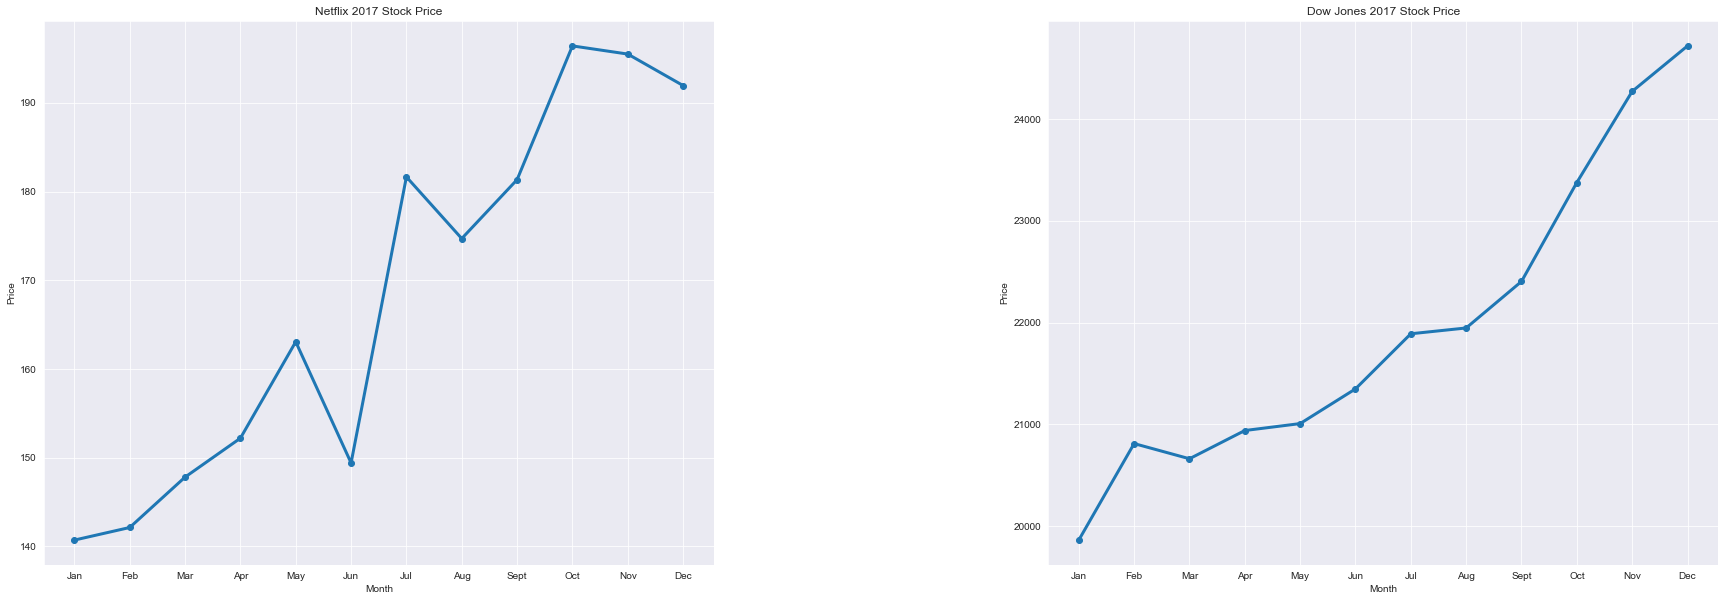

In [13]:
plt.figure(figsize = (30, 10))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(nflx['Date'], nflx['Price'], linewidth = 3, marker = 'o')
ax1.set_title('Netflix 2017 Stock Price')
plt.xlabel('Month')
plt.ylabel('Price')
ax1.set_xticklabels(months)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dji['Date'], dji['Price'], linewidth = 3, marker = 'o')
ax2.set_title('Dow Jones 2017 Stock Price')
plt.xlabel('Month')
plt.ylabel('Price')
ax2.set_xticklabels(months)

plt.subplots_adjust(wspace = 0.5)
plt.show()